### Bonjour, on se propose dans ce Notebook de faire une analyse descriptive d'un jeu de données relatives à des patients qui sont malades de *bactérémie*, ou bien sont en bonne santé. ###
Le bactérémie est l'état dans lequel un pathogène a gagné le sang, c'est très dangereux, ça peut être fatal. 
Les variables qu'on a pour les patients sont différentes mesures effectuées à partir d'**examens du sang**. 



données dispo ici : https://zenodo.org/records/7554815#.ZF-dztLMK-Y

In [1]:
import pandas as pd
import numpy as np
import random
from random import sample

In [2]:
table = pd.read_csv("/home/zuko/Téléchargements/Bacteremia_public_S2.csv", index_col='ID')
table[:5].T

ID,1,3,5,7,9
SEX,2,1,1,1,2
AGE,62,72,46,84,38
MCV,99.3,85.1,96.3,91.3,85.1
HGB,11.5,10.3,7.4,10.3,13.7
HCT,35.9,34.7,22.8,31.1,38.7
PLT,307.0,182.0,64.0,309.0,183.0
MCH,31.5,26.0,31.2,30.4,30.2
MCHC,31.8,30.6,32.4,33.3,35.3
RDW,19.5,15.0,19.7,13.8,12.6
MPV,10.8,9.7,11.1,8.5,10.0


In [3]:
table.sort_index(inplace=True) #améliore la perf et permet gérer eventuelles erreurs si des ind dupliqués

In [4]:
table.map(lambda x  : pd.isna(x)).sum(axis=1)

ID
1         0
3        10
5         4
7         0
9         2
         ..
62436     4
62438    14
62446     4
62454     0
62455     0
Length: 14691, dtype: int64

In [5]:
table.shape # on a > 14000 ind! 

(14691, 52)

In [ ]:
# on pourrait elaguer les colonnes ayant vraiment trop de NAN?
#table.drop(columns = [col for col in table.columns if table[col].isnull().sum() > 3000], inplace = True)

In [6]:
# quelles colonnes ont enormement de nan?
l = ((col, table[col].isnull().sum()) for col in table.columns if table[col].isnull().sum() > 200)
#%timeit list(l)
list(l)[:3]

[('MPV', 702), ('LYM', 262), ('MONO', 246)]

In [7]:
l = ((col, table[col].isnull().sum()) for col in table.columns if table[col].isnull().sum() > 200)
print(f"{len(list(l))} colonnes ont plus de 200 NAN")

37 colonnes ont plus de 200 NAN


In [8]:
def compteur_nan(df):
    for ind in df.index:
        nan_val = 0
        for value in df.loc[ind] :
            if pd.isna(value) == True:
                nan_val += 1
        if nan_val > 0: #compter lignes sans NAN
            yield (ind, nan_val) #ici on sort des tuples car on veut examiner nombres nan par index

In [9]:
print(f"{len(list(compteur_nan(table)))} lignes len(NAN) > 0") 
list(compteur_nan(table))[:10]

10712 lignes len(NAN) > 0


[(3, 10),
 (5, 4),
 (9, 2),
 (11, 13),
 (12, 2),
 (13, 13),
 (25, 10),
 (26, 9),
 (27, 16),
 (28, 10)]

In [10]:
def nan_lignes(df):
    for ind in df.index: #The index (row labels) of the DataFrame. (from documentation)
        nan_val = 0
        for value in df.loc[ind] :
            if pd.isna(value) == True:
                nan_val += 1
        if nan_val > 5: #compter lignes avec NAN
            yield ind#(ind, nan_val)

In [11]:
table.drop(index = [ind for ind in nan_lignes(table)], inplace = True)
#test que ca a marché
print(f"{len(list(nan_lignes(table)))} lignes avec plus de 5 NAN") 

0 lignes avec plus de 5 NAN


In [12]:
long = len(list(compteur_nan(table))) # len de liste lignes ayant 0 >= NAN > 6
k = 3 #on tire k individu
choice = random.sample(range(long), k) #on tire k ind au hasard parmi nos individus qui ondes NAN mais < 6
print(f"on tire {choice[-1]} ème des lignes qui ont des NAN<6, la liste fait {len(list(compteur_nan(table)))} lignes")

ch_ligne, _ = list(compteur_nan(table))[choice.pop()] #recupère individu ou index_label à partir tirage
print(f"son index_label est : {ch_ligne}")
res = table.loc[ch_ligne].T

on tire 629 ème des lignes qui ont des NAN<6, la liste fait 6124 lignes
son index_label est : 5315


In [13]:
res, res.index[0]# list(nan_seuil(compteur_nan(table)))[choice.pop()]

(SEX                     2
 AGE                    50
 MCV                  96.8
 HGB                  12.3
 HCT                  38.4
 PLT                  15.0
 MCH                  30.7
 MCHC                 31.8
 RDW                  23.7
 MPV                   NaN
 LYM                   0.1
 MONO                  0.3
 EOS                   0.0
 BASO                  0.0
 NT                   45.0
 APTT                 44.8
 FIB                 487.0
 SODIUM              132.0
 POTASS               4.14
 CA                    1.9
 PHOS                 1.55
 MG                    0.6
 CREA                 2.43
 BUN                  69.9
 HS                    4.8
 GBIL                 1.56
 TP                   31.8
 ALB                  14.7
 AMY                  16.0
 PAMY                 12.0
 LIP                  10.0
 CHE                   1.0
 AP                  673.0
 ASAT                 18.0
 ALAT                 23.0
 GGT                 718.0
 LDH                 219.0
 

In [14]:
def affecter_nan(df):
    for col in df.columns:
        if table[col].isnull().sum() > 0:
            for ind, val in enumerate(table[col]): #ind ici est rang dans series
                if pd.isna(val) == True:
                    table.loc[table.index[ind], col] = table[col].mean()

In [15]:
#%timeit 
affecter_nan(table)

In [16]:
len(list(compteur_nan(table))) #test s'il reste des lignes qui ont des Nan

0

In [ ]:
#X = np.linspace(0., 10., 50) array plus rapide que listes, linspace : creer array avec (borne, borne incluse, nb de pts)
#out_data = (une_fonction(x) for x in in_data)

En fait en numpy on passe son temps à écrire des expressions dont les éléments sont des tableaux, et cela produit des opérations membre à membre, comme on vient de le voir avec cosinus.

In [ ]:
# l'énorme majorité du temps, on écrit avec numpy
# des expressions qui impliquent des tableaux
# exactement comme si c'était des nombres

In [ ]:
#np.all(a == b) vérifier que tous les éléments du tableau sont vrais

on utilise plutôt les tableaux logiques comme des masques, pour faire ou non des opérations sur un autre tableau

In [ ]:
table.groupby('BloodCulture', observed=True).mean(numeric_only=True).T

In [ ]:
#s = s.sort_index() ne fait pas de tri en place il faut reaffecter

In [ ]:
#table.loc[:, 'globules'].mean()
#lignes = table.loc[:, 'sex'] == 'M'
#table.loc[lignes, 'globules'].mean()

In [ ]:
# quels sont les taux de lymphocytes selon malade/ sain et selon sexe? (1=male)
table.pivot_table('LYM',
                  aggfunc = 'mean',
                  index = 'BloodCulture',
                  columns = 'SEX'
                 )

In [17]:
table.shape

(10103, 52)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_df = table.copy().drop(columns = ['SEX', 'BloodCulture'])
data = pca_df.values#.T
scaler = StandardScaler()
scaled_data = scaler.fit(data)
scaled_data = scaler.transform(data)
pca = PCA()
p = pca.fit(scaled_data) #resultats de ACP

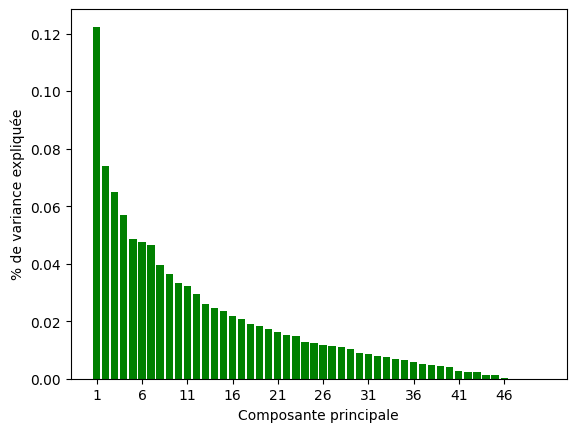

In [46]:
import matplotlib.pyplot as plt
ratios = pca.explained_variance_ratio_#[:25]

plt.bar(np.arange(1,len(ratios)+1), ratios, color='green')
plt.xticks(np.arange(1,len(ratios)+1, 5), np.arange(1, len(ratios)+1, 5))
plt.xlabel("Composante principale")
plt.ylabel("% de variance expliquée")
plt.show()

critère de Kayser : interpréter seulement axes dont lambda >= 1 = variance d'une seule var du jeu données initial

In [ ]:
from sklearn.cluster import KMeans

array = []
for i in range(1,20):
    kmeans_i = KMeans(n_clusters=i, n_init=1, init='random').fit(data)
    inertie = kmeans_i.inertia_
    array.append(inertie)
plt.bar(range(1,20), array)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)

/tmp/ipykernel_241811/3979865362.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=table['BloodCulture'].replace({'yes':1, 'no':0}), marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})


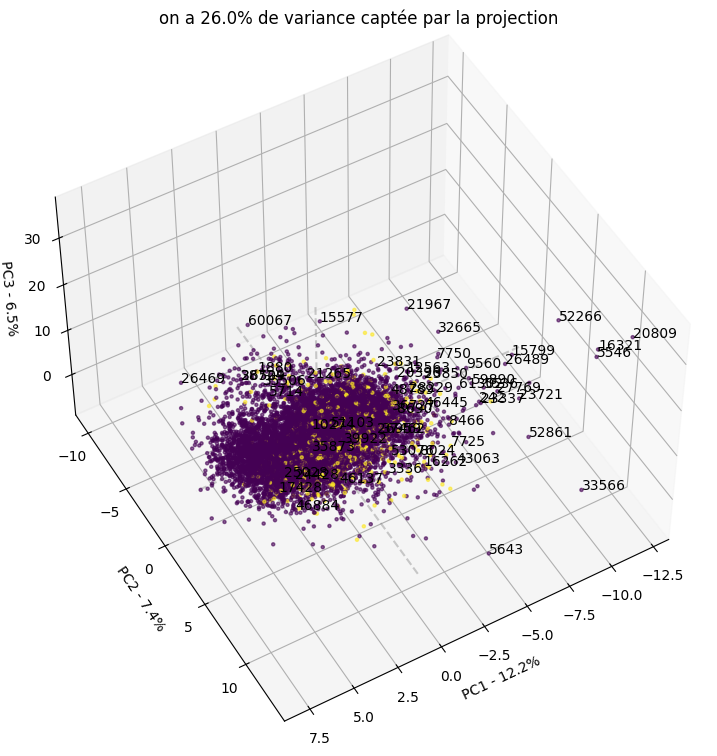

In [20]:
liste_ini = []
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=50, azim=60)
comp = p.transform(scaled_data)
# La couleur des points dépend de leur étiquette 
ax.plot(np.arange(-12, 7.7),0, 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0,np.arange(-10, 13), 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0, 0, np.arange(-5, 30), linestyle='dashed', c='grey', alpha=0.4)

ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=table['BloodCulture'].replace({'yes':1, 'no':0}), marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})
ax.set_xlabel(f"PC1 - {100*p.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*p.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*p.explained_variance_ratio_[2]:.1f}%")
for i in np.arange(0, comp.shape[0]): #this part is based on a stackoverflow discussion
    if np.linalg.norm(comp[i,:]) > 20:
        ax.text(comp[i,0], comp[i,1], comp[i,2], s=pca_df.index[i])
        liste_ini.append(pca_df.index[i])
ax.set_title(f"on a {np.round(np.sum(p.explained_variance_ratio_[:3])*100)}% de variance captée par la projection")
plt.show()

In [21]:
pca.components_.shape

(50, 50)

/tmp/ipykernel_241811/1185463716.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax.scatter(comp[:,3], comp[:,4], comp[:,5], c=table['BloodCulture'].replace({'yes':1, 'no':0}), marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})


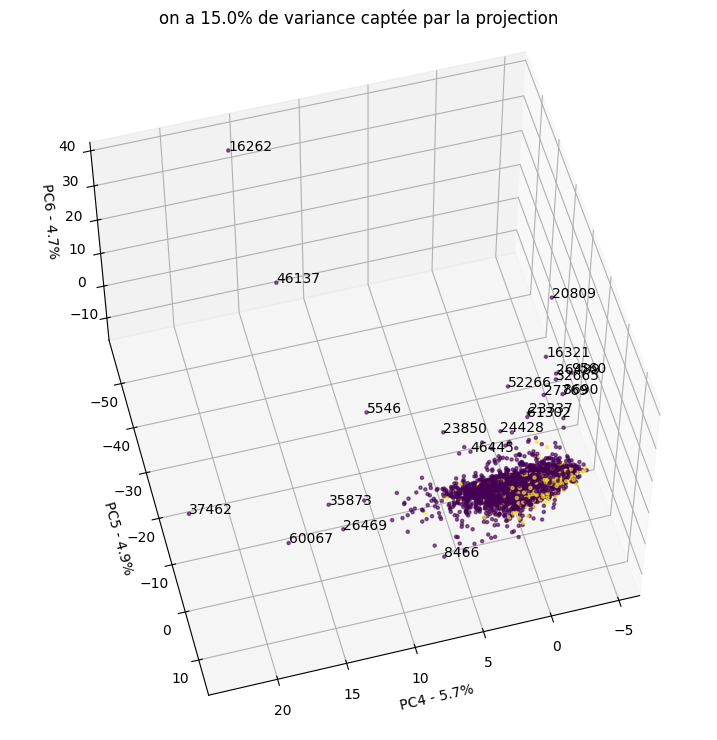

In [22]:
import matplotlib.pyplot as plt
liste = []
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=55, azim=75)
comp = p.transform(scaled_data)
# La couleur des points dépend de leur étiquette 
ax.scatter(comp[:,3], comp[:,4], comp[:,5], c=table['BloodCulture'].replace({'yes':1, 'no':0}), marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})
ax.set_xlabel(f"PC4 - {100*p.explained_variance_ratio_[3]:.1f}%")
ax.set_ylabel(f"PC5 - {100*p.explained_variance_ratio_[4]:.1f}%")
ax.set_zlabel(f"PC6 - {100*p.explained_variance_ratio_[5]:.1f}%")
for i in np.arange(0, comp.shape[0]): 
    if np.linalg.norm(comp[i,3:7]) > 14:
        #this part is based on a stackoverflow discussion
        ax.text(comp[i,3], comp[i,4], comp[i,5], s=pca_df.index[i])
        liste.append(pca_df.index[i])
ax.set_title(f"on a {np.round(np.sum(p.explained_variance_ratio_[3:6])*100)}% de variance captée par la projection")

plt.show()

In [ ]:
final_list = []
for i in liste:
    if i in liste_ini:
        final_list.append(i)

In [ ]:
final_list

In [ ]:
moyennes = [table[i].mean() for i in table.columns[:-1]]
if len(moyennes)+1 == len(table.columns):
    nouvelle_ligne = moyennes+['maybe']
    s = pd.Series(dict(zip(table.columns, nouvelle_ligne)))
pd.concat([table.loc[final_list], s.to_frame().T]).T

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(data, 'ward')
# Plot title
plt.title('Hierarchical Clustering Dendrogram')
# Plot axis labels
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
# Make the dendrogram
dendrogram(Z, labels=table.index, leaf_rotation=90)
# Show the graph
plt.show()

In [41]:
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_,columns=PCnames,index=pca_df.columns)

Loadings.iloc[:,:3]

,PC1,PC2,PC3
AGE,-1.308726e-01,-5.294705e-02,3.082269e-01
MCV,3.876123e-02,-3.098252e-02,2.007623e-01
HGB,1.210593e-02,1.750995e-01,1.343098e-01
HCT,1.339033e-03,-1.725164e-01,-9.263740e-02
PLT,1.256014e-01,-1.424262e-01,-3.533371e-02
MCH,-8.007832e-02,-3.261449e-01,-6.165828e-02
MCHC,8.512785e-02,5.413799e-02,5.977236e-03
RDW,3.710890e-02,2.519926e-02,-3.104527e-02
MPV,-5.642972e-02,-2.718573e-01,3.227937e-02
LYM,3.827366e-03,1.864205e-01,5.616850e-03


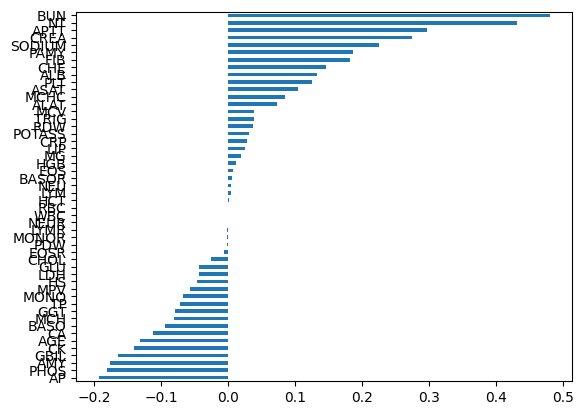

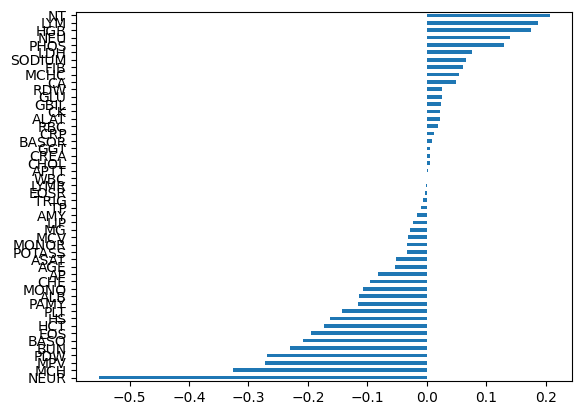

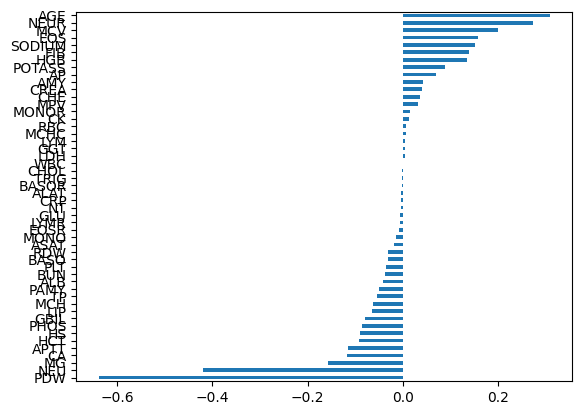

In [42]:
for i in Loadings.columns[:3]:
    Loadings[f"{i}"].sort_values().plot.barh()
    plt.show()

In [ ]:
coef.shape

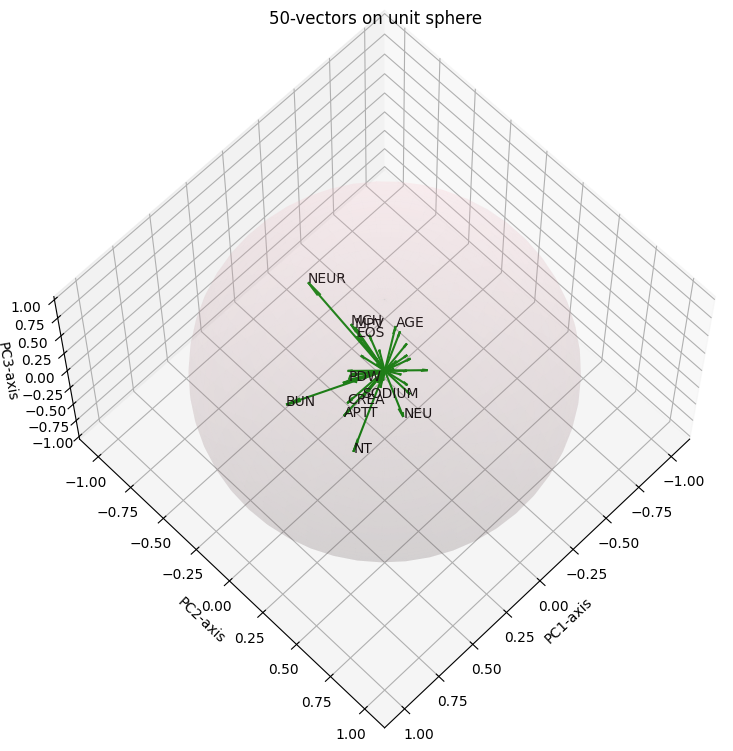

In [31]:
#sphere des correlations
fig = plt.figure(figsize=(9, 12))
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(111, projection='3d', elev=65, azim=45)
# draw sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
# alpha controls opacity
ax.plot_surface(x, y, z, color="pink", alpha=0.1)


# a random array of 3D coordinates in [-1,1]

coef = np.transpose(pca.components_)
# tails of the arrows
tails= np.zeros(len(coef[1]))

#ax.scatter(coef[0,:], coef[1,:], coef[2,:], color='g', marker='.')
# heads of the arrows with adjusted arrow head length
ax.quiver(tails,tails,tails,coef[0,:], coef[1,:], coef[2,:], color='g', arrow_length_ratio=0.15)

ax.set_xlabel('PC1-axis')
ax.set_ylabel('PC2-axis')
ax.set_zlabel('PC3-axis')

for i in np.arange(0, coef.shape[1]): #this part is based on a stackoverflow discussion
    if np.linalg.norm(coef[:3,i]) > 0.25:
        ax.text(coef[0,i], coef[1,i], coef[2,i], s=pca_df.columns[i])
ax.set_title(f'{len(coef)}-vectors on unit sphere')

plt.show()

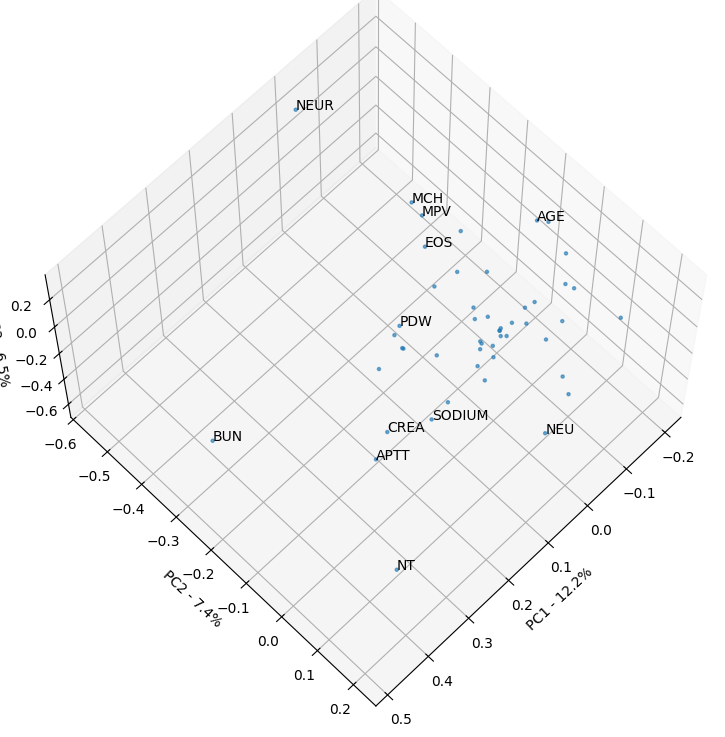

In [37]:
liste_ini = []
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=65, azim=45)
#tr = p.transform(scaled_data)
# La couleur des points dépend de


ax.scatter(coef[0,:], coef[1,:], coef[2,:], marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})

ax.set_xlabel(f"PC1 - {100*p.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*p.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*p.explained_variance_ratio_[2]:.1f}%")
for i in np.arange(0, coef.shape[1]): #this part is based on a stackoverflow discussion
    if np.linalg.norm(coef[:3,i]) > .25:
        ax.text(coef[0,i], coef[1,i], coef[2,i], s=pca_df.columns[i])
        liste_ini.append(pca_df.columns[i])
plt.show()